In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import io
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as datasets

Word embedding or word vector is an approach with which we represent documents and words.
- It is defined as a numeric vector input that allows words with similar meanings to have the same representation.
- It can approximate meaning and represent a word in a lower dimensional space.

In [47]:
def get_data():
  (train_data,test_data),info = datasets.load('imdb_reviews/subwords8k',
                                              split=(datasets.Split.TRAIN,datasets.Split.TEST),
                                              with_info=True,shuffle_files=True,as_supervised=True)

  ## Visualize the train data to check the values and labels
  # print("train data is: ")
  # for text,labels in test_data.take(2):
  #   print("text: ",text,"\nlabel: ",labels)

  encoder = info.features['text'].encoder
  padded_shapes=([None],())

  #There are 10,000 words so we have 1000words per batch so 10 batches
  train_batches = train_data.shuffle(1000).padded_batch(10,padded_shapes=padded_shapes)
  test_batches = test_data.shuffle(1000).padded_batch(10,padded_shapes=padded_shapes)

  return train_batches,test_batches,encoder

def get_model(encoder,embedding_dimensions=16):
  model = keras.Sequential([
      layers.Embedding(encoder.vocab_size,embedding_dimensions),
      layers.GlobalAveragePooling1D(),
      layers.Dense(24,activation="relu"),
      layers.Dense(1,activation="sigmoid")
  ])

  model.compile(optimizer = "adam",loss="binary_crossentropy",metrics=["accuracy"])
  return model


def plot_results(history):
  history_values=history.history
  accuracy = history_values['accuracy']
  validation_acc = history_values['val_accuracy']
  loss = history_values['val_loss']
  epochs=range(1,len(accuracy)+1)

  plt.figure(figsize=(7,4))
  plt.plot(epochs,accuracy,'r',label="Accuracy")
  plt.plot(epochs,validation_acc,'b',label="Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy and Validation accuracy")
  plt.legend(loc="lower right")
  plt.ylim((0.5,1))
  plt.show()


Epoch 1/10
2500/2500 [==============================] - 132s 52ms/step - loss: 0.5029 - accuracy: 0.7540 - val_loss: 0.3729 - val_accuracy: 0.8272
Epoch 2/10
2500/2500 [==============================] - 45s 18ms/step - loss: 0.2765 - accuracy: 0.8968 - val_loss: 0.3483 - val_accuracy: 0.8472
Epoch 3/10
2500/2500 [==============================] - 28s 11ms/step - loss: 0.2252 - accuracy: 0.9172 - val_loss: 0.3097 - val_accuracy: 0.8820
Epoch 4/10
2500/2500 [==============================] - 28s 11ms/step - loss: 0.1929 - accuracy: 0.9311 - val_loss: 0.3235 - val_accuracy: 0.8780
Epoch 5/10
2500/2500 [==============================] - 24s 9ms/step - loss: 0.1679 - accuracy: 0.9409 - val_loss: 0.3848 - val_accuracy: 0.8515
Epoch 6/10
2500/2500 [==============================] - 21s 9ms/step - loss: 0.1549 - accuracy: 0.9468 - val_loss: 0.3714 - val_accuracy: 0.8675
Epoch 7/10
2500/2500 [==============================] - 26s 10ms/step - loss: 0.1402 - accuracy: 0.9520 - val_loss: 0.4079 - 

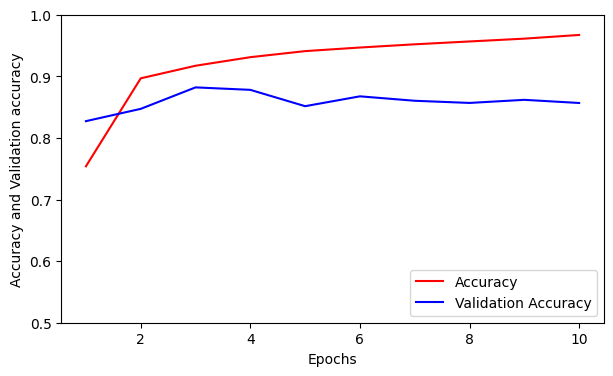

In [48]:
train_batches,test_batches,encoder = get_data()
model =  get_model(encoder)
history = model.fit(train_batches,epochs = 10, validation_data = test_batches)
plot_results(history)

In [64]:
def retrieve_embeddings(model,encoder):
  out_vectors = io.open('/content/drive/MyDrive/NLP_embeddings/vecs.tsv','w', encoding ='utf-8')
  out_metadata = io.open('/content/drive/MyDrive/NLP_embeddings/meta.tsv','w',encoding = 'utf-8')
  weights = model.layers[0].get_weights()[0]
  for num,word in enumerate(encoder.subwords):
    vec = weights[num+1]
    out_metadata.write(word + '\n')
    out_vectors.write('\t'.join([str(x) for x in vec]) + '\n')
  out_vectors.close()
  out_metadata.close()

In [65]:
retrieve_embeddings(model,encoder)

In [63]:
for num,word in enumerate(encoder.subwords):
  print('num: ',num)
  print('word: ',word)

Streaming output truncated to the last 5000 lines.
num:  5428
word:  fores
num:  5429
word:  exh
num:  5430
word:  dancer
num:  5431
word:  anger
num:  5432
word:  Wr
num:  5433
word:  They
num:  5434
word:  Sinatra
num:  5435
word:  SI
num:  5436
word:  Op
num:  5437
word:  Long
num:  5438
word:  GI
num:  5439
word:  Dem
num:  5440
word:  yd
num:  5441
word:  week_
num:  5442
word:  treatment
num:  5443
word:  treat
num:  5444
word:  stan
num:  5445
word:  slic
num:  5446
word:  separate
num:  5447
word:  screenplay
num:  5448
word:  remarkable_
num:  5449
word:  pped_
num:  5450
word:  persona
num:  5451
word:  mble
num:  5452
word:  invi
num:  5453
word:  innocen
num:  5454
word:  hack
num:  5455
word:  gru
num:  5456
word:  gma
num:  5457
word:  glass
num:  5458
word:  forgotten_
num:  5459
word:  fem
num:  5460
word:  confi
num:  5461
word:  clever
num:  5462
word:  bone
num:  5463
word:  amateur
num:  5464
word:  Richard
num:  5465
word:  Ray_
num:  5466
word:  Please_
num:  5467